In [3]:
from numpy.linalg import *
import numpy as np
from IPython.display import Image

#### From CHAPTER 10 NUMERICAL METHODS page 4/11
https://college.cengage.com/mathematics/larson/elementary_linear/5e/students/ch08-10/chap_10_4.pdf

Figure 10.3 is a diagram of a maze used in a laboratory experiment. The experiment beginsby  placing  a  mouse  at  one  of  the  ten  interior  intersections  of  the  maze.  Once  the  mouseemerges in the outer corridor, it cannot return to the maze. When the mouse is at an interiorintersection, its  choice  of  paths  is  assumed  to  be  random.  What  is  the  probability  that  themouse will emerge in the “food corridor” when it begins at the ith intersection?

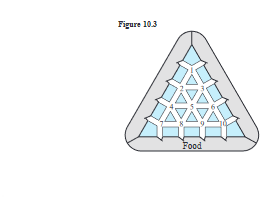

In [59]:
Image("10.3.png")

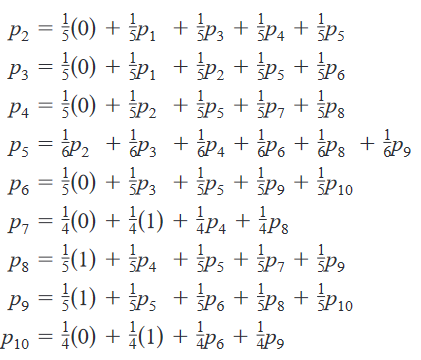

In [58]:
Image("2.png")

In [14]:
A = np.array([
    [ 4,-1,-1, 0, 0, 0, 0, 0, 0, 0],
    [-1, 5,-1,-1,-1, 0, 0 ,0, 0, 0],
    [-1,-1, 5, 0,-1,-1, 0, 0, 0, 0],
    [ 0,-1, 0, 5,-1, 0,-1,-1, 0, 0],
    [ 0,-1,-1,-1, 6,-1, 0,-1,-1, 0],
    [ 0, 0,-1, 0,-1, 5, 0, 0,-1,-1],
    [ 0, 0, 0,-1, 0, 0, 4,-1, 0, 0],
    [ 0, 0, 0,-1,-1, 0,-1, 5,-1, 0],
    [ 0, 0, 0, 0,-1,-1, 0,-1, 5,-1],
    [ 0, 0, 0, 0, 0,-1, 0, 0,-1, 4],
])

b = np.array([0,0,0,0,0,0,1,1,1,1])

### Solution using Jacobi

In [49]:
def Jacobi(A, b, tolerance ,xk_1 = np.zeros(A.shape[0])):
    """Calculate the probapilities vector using jacobi furmula
       by solving the system of linear equations
           
       Return:
           namupy array(the solution of the linear system) in other word 
           it returns the vector of probabilities
    """
    D = np.diag(A)
    u_pluse_l = A - np.diag(D)
    xk =  inv(np.diag(D)) @ (b - (u_pluse_l @ xk_1))
    
    iteration = 0
    while ( norm(xk - xk_1, 2) > tolerance ):
        iteration+=1
        xk_1 = xk
        xk = inv(np.diag(D)) @ (b - (u_pluse_l @ xk_1))
    return xk, iteration

In [50]:
Jacobi(A, b, 1e-5)

(array([0.09018859, 0.18038043, 0.18038043, 0.29802748, 0.33331835,
        0.29802748, 0.45489447, 0.5215569 , 0.5215569 , 0.45489447]),
 41)

### Gauss seidel

In [55]:
def gauss_seidel(A, b, tolerance, xk_1 = np.zeros(A.shape[1])):
    """Calculate the probapilities vector using gauss seidel furmula
       by solving the system of linear equations
           
       Return:
           namupy array(the solution of the linear system) in other word 
           it returns the vector of probabilities
    """
    l_pluse_d = np.tril(A)
    u = A - l_pluse_d
    xk = inv(l_pluse_d) @ (b - (u @ xk_1))
    iteration = 0
    while (norm(xk_1-xk, 2) > tolerance):
        iteration+=1
        xk_1 = xk
        xk = inv(l_pluse_d) @ (b - (u @ xk_1))
    return xk, iteration

In [56]:
gauss_seidel(A, b, 1e-5)

(array([0.09019143, 0.18038595, 0.18038688, 0.29803394, 0.33332759,
        0.29803538, 0.45489909, 0.52156479, 0.52156537, 0.45490019]),
 23)

You can check the final result in the pdf in page 6/11<br>
Good luck :)